 # **Breast Cancer Wisconsin (Diagnostic) Data Linear Regression**

### 02123049 / 이원준 / ETRI

### Pattern Recognition and Machine Learning

![](https://miro.medium.com/max/1400/1*pxFCmhRFTighUn88baLcSA.png)

### The purpose of this dataset is to find the relationship between the factors that most affect the differentiation of Benign and Maliganant of breast cancer.

# Importing Libraries

---

In [1]:
#필수 라이브러리 
import os
import numpy as np
import pandas as pd
import missingno as msno

#시각화 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 전처리 및 평가
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 학습 모델 구축 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dir = './data.csv'

In [3]:
df = pd.read_csv(base_dir)

## DATA


---

In [4]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

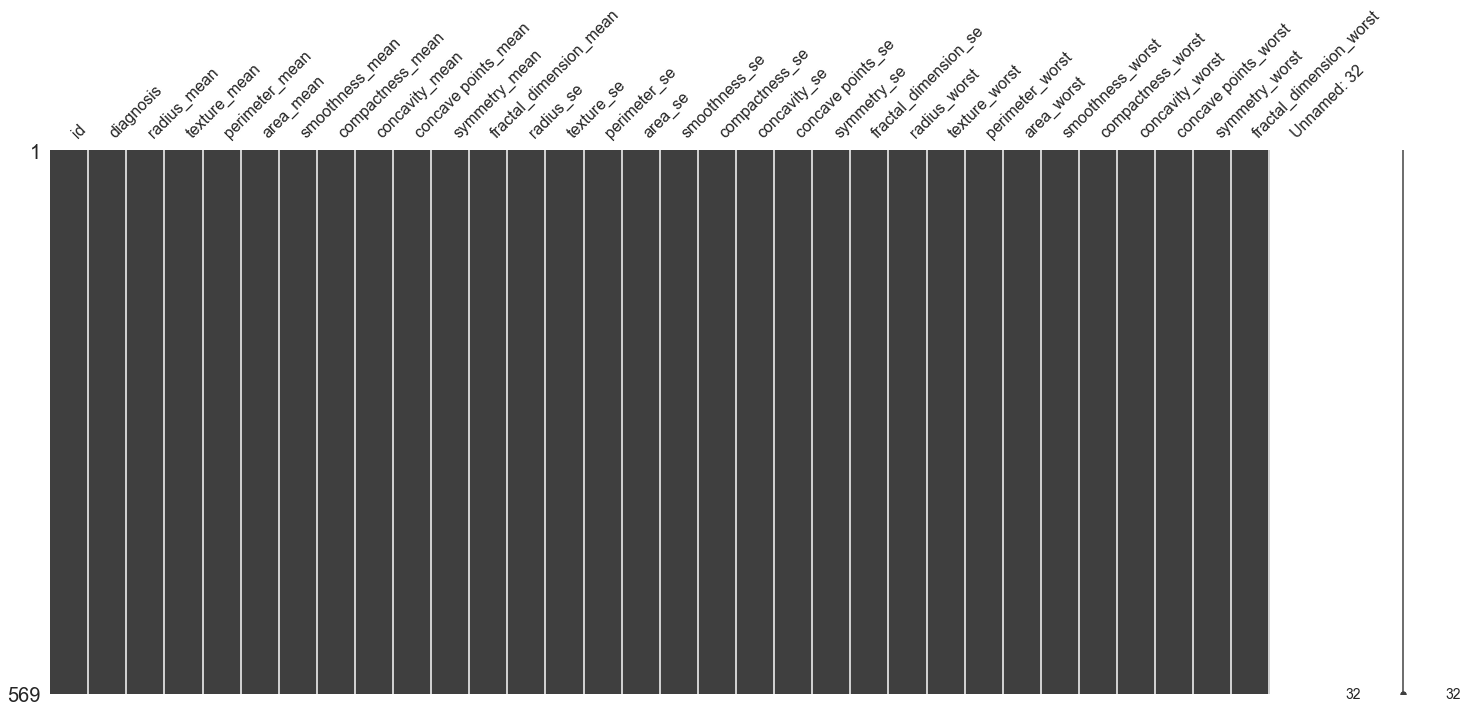

In [7]:
# Null 값 확인 

msno.matrix(df);

In [8]:
# 불필요 변수 드롭

df = df.drop(["id", "Unnamed: 32" ], axis=1)

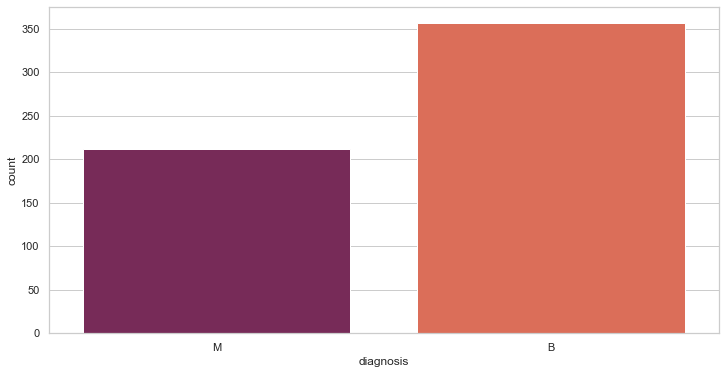

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=df, palette='rocket');


In [10]:
#필드와 칼럼 구분 
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

# Histogram
---

https://newly0513.tistory.com/141

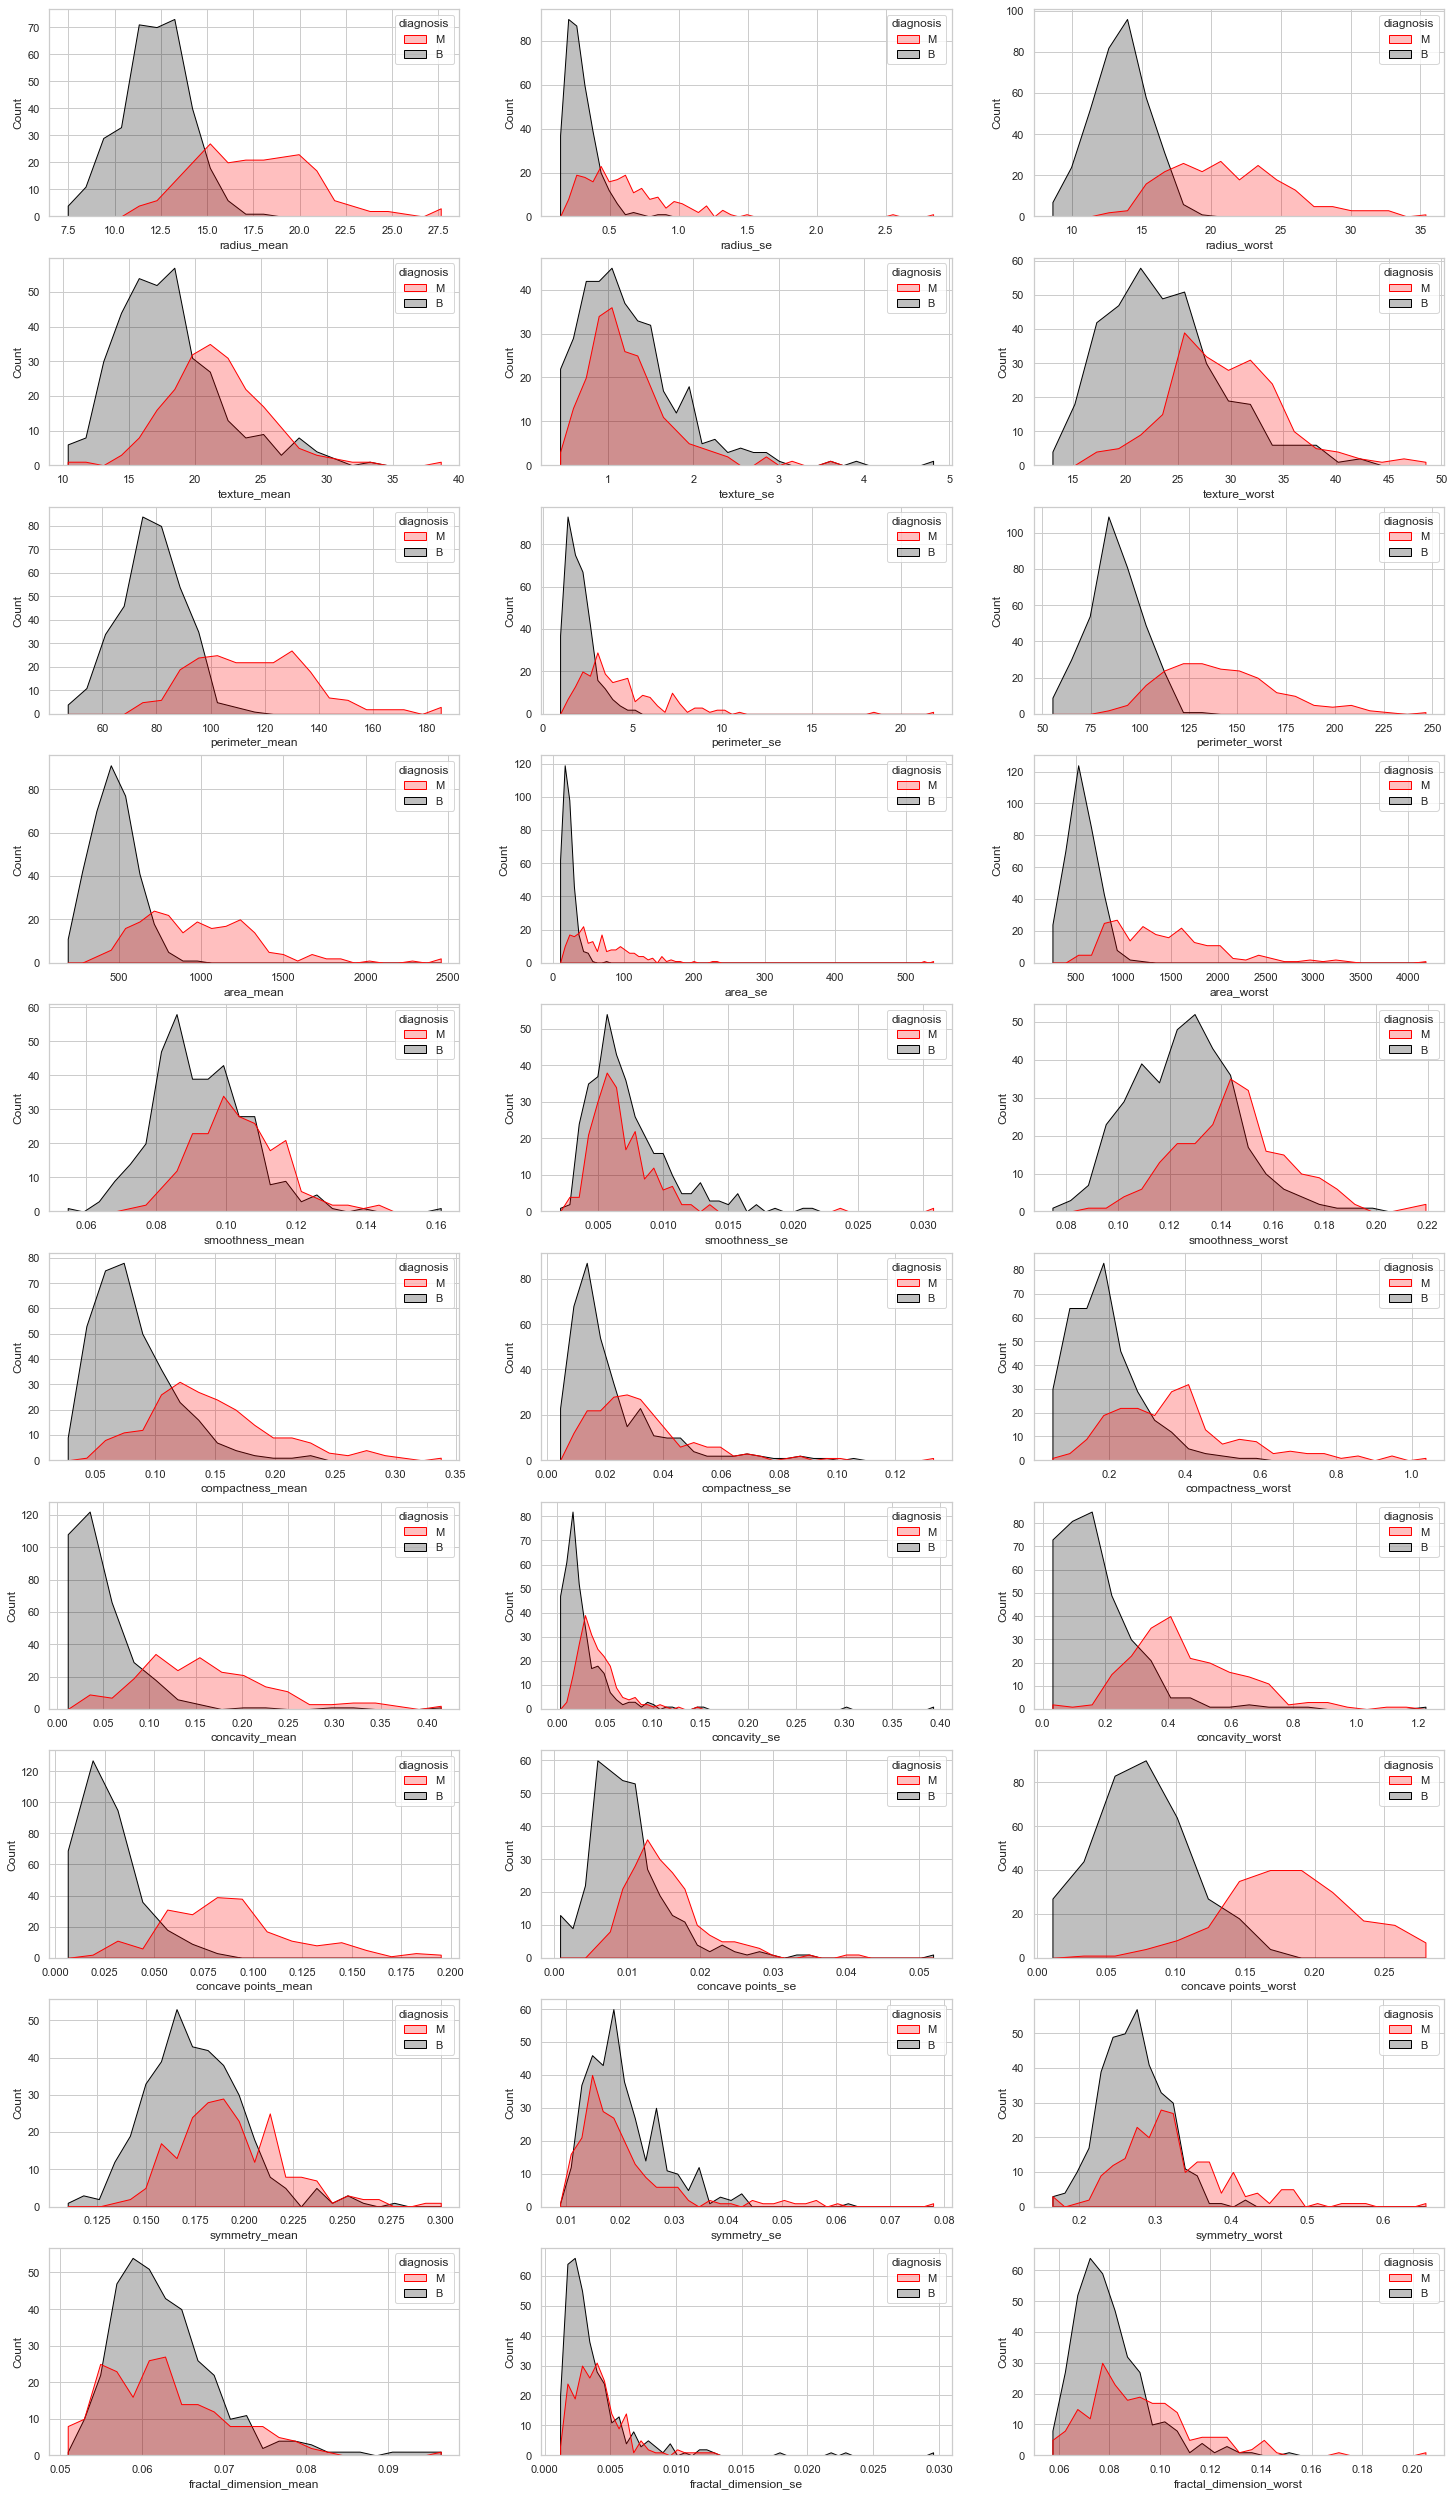

In [11]:
fig, axs = plt.subplots(10,3, figsize=(25,45))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["red", "black"],
                     ax=axs[col][f])


### Visualization to see the distribution of each variable Since the related variable is continuous data - expressed in histograms Through Histogram, it is possible to distinguish between benign and malignant, and to know the impossible characteristics

radius_mean
texture_mean
perimeter_mean
area_mean
radius_worst
texture_worst
perimeter_worst
area_worst

### there is also a characteristic that cannot distinguish between positive and malignant . 
compactness_se
concavity_se
concave_points_se
simmetry_se
smoothness_se


# Heatmap and  Multicollinearity 

----

###  Multicollinearity is a problem because it undermines the statistical significance of an independent variable. 


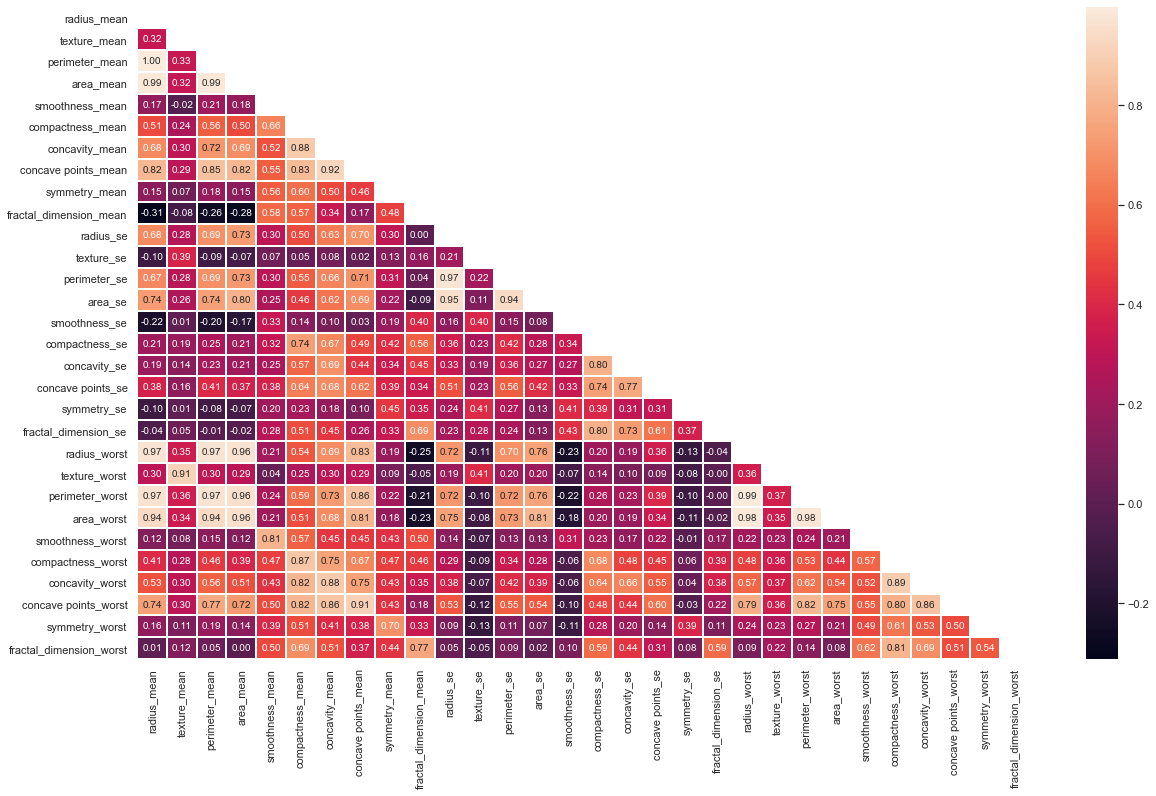

In [12]:

# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### With heatmaps, we can see correlation between this columns:
---

* *perimeter - radius*
* *area - radius*
* *area - perimeter*
* *concavity - compactness*
* *fractal_dimension - compactness*
* *concave points - compactness*
* *concave points - concavity*
* *concave points - radius*
* *concave points - perimeter*
* *concave points - area*

In [13]:
# 너무 높은 상관관계 제거..! 

corr_matrix = df.corr().abs() 


#상삼각행렬만 출력. 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

print(to_drop)

df = df.drop(to_drop, axis = 1)

print(f"After Process : {df.shape[1]}")

['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']
After Process : 23


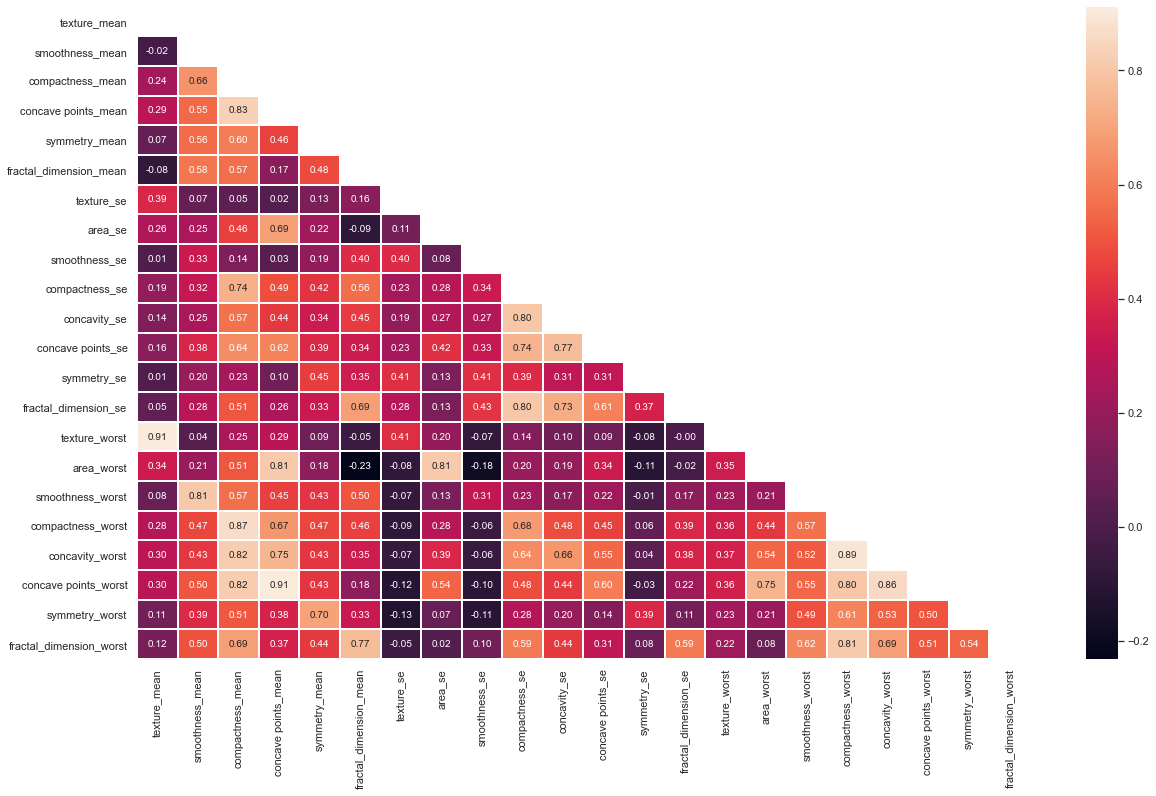

In [14]:
# heatmap 

plt.figure(figsize = (20, 12))

#상삼각행렬만 출력 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) 


sns.heatmap(corr,  mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# Set Variable

---

In [15]:
x = df['concavity_worst']
y = df['compactness_worst']

In [16]:
x.head()

0    0.7119
1    0.2416
2    0.4504
3    0.6869
4    0.4000
Name: concavity_worst, dtype: float64

In [17]:
y.head()

0    0.6656
1    0.1866
2    0.4245
3    0.8663
4    0.2050
Name: compactness_worst, dtype: float64

In [18]:
#제일 상관관계 높은 인자끼리 비교
x = df['concavity_worst']
y = df['compactness_worst']

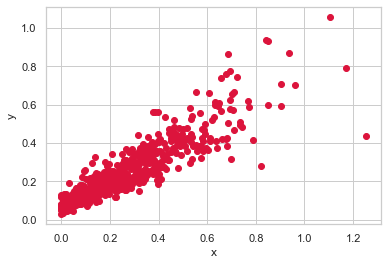

In [19]:
plt.scatter(x, y, color = 'crimson')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Split data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (455,)
x_test : (114,)
y_train : (455,)
y_test : (114,)


In [21]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# Linear Regression

In [22]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print(y_pred)

print(y_test)

print(reg.score(x_test, y_test))

[[0.41602175]
 [0.16509766]
 [0.11350832]
 [0.17691459]
 [0.10387246]
 [0.18089859]
 [0.2678712 ]
 [0.12468376]
 [0.07123747]
 [0.1195991 ]
 [0.28860147]
 [0.13328648]
 [0.19737477]
 [0.19832012]
 [0.2470734 ]
 [0.46491008]
 [0.38246167]
 [0.35119744]
 [0.32979192]
 [0.54330698]
 [0.54094359]
 [0.41061972]
 [0.19602426]
 [0.17056721]
 [0.34295935]
 [0.1734708 ]
 [0.08375666]
 [0.54006576]
 [0.163342  ]
 [0.3841498 ]
 [0.08986095]
 [0.23437864]
 [0.37537151]
 [0.27327322]
 [0.07123747]
 [0.34295935]
 [0.19183769]
 [0.28779117]
 [0.15361836]
 [0.34329698]
 [0.17569914]
 [0.13498812]
 [0.16975691]
 [0.10084057]
 [0.51393346]
 [0.34856396]
 [0.07123747]
 [0.11331249]
 [0.13068001]
 [0.54567036]
 [0.31696211]
 [0.38111116]
 [0.33897536]
 [0.19683456]
 [0.19980568]
 [0.13756759]
 [0.14477254]
 [0.07123747]
 [0.14855396]
 [0.463357  ]
 [0.32844141]
 [0.2622666 ]
 [0.15233538]
 [0.2057479 ]
 [0.42000574]
 [0.10853845]
 [0.72002074]
 [0.29008703]
 [0.33195273]
 [0.1347923 ]
 [0.32479504]
 [0.39

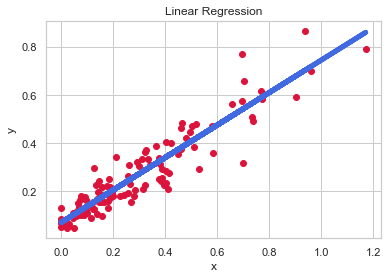

In [23]:
plt.scatter(x_test, y_test, color = 'crimson')
plt.plot(x_test, y_pred, color='royalblue', linewidth=5)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()